# RFM analysis and Customer Segmentation

In [1]:
#import libraries and uploading datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel("Oldcustomer.xlsx")
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,67.075502,Software Engineer I,Financial Services,Mass Customer,N,Yes,10
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04,42.993310,Clinical Specialist,Health,Mass Customer,N,Yes,10
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,Male,9,1977-06-03,44.667283,Desktop Support Technician,Retail,Affluent Customer,N,No,22
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,Male,83,1962-01-14,60.061803,Staff Scientist,Financial Services,Mass Customer,N,No,16
4,6,25,2339,2017-03-08,True,Approved,Giant Bicycles,Road,medium,medium,...,Male,3,1958-12-28,63.111118,Web Designer II,Property,Affluent Customer,N,Yes,16


In [3]:
df["transaction_date"].max()


Timestamp('2017-12-30 00:00:00')

In [4]:
df["transaction_date"].min()

Timestamp('2017-01-01 00:00:00')

In [5]:
df.isnull().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
profit                                 0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
Age                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [6]:
df.shape

(14069, 24)

In [7]:
df.dtypes

transaction_id                                  int64
product_id                                      int64
customer_id                                     int64
transaction_date                       datetime64[ns]
online_order                                     bool
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                datetime64[ns]
profit                                        float64
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
Age                                           float64
job_title                   

In [8]:
df["transaction_date"].value_counts()

2017-02-14    59
2017-08-18    59
2017-01-31    57
2017-08-21    54
2017-11-06    52
              ..
2017-10-19    25
2017-05-16    24
2017-03-27    24
2017-01-12    23
2017-03-29    22
Name: transaction_date, Length: 364, dtype: int64

In [9]:
# import datetime
from datetime import timedelta
from datetime import datetime, timedelta
recent = (df["transaction_date"].max()) + timedelta(days=1)
print(recent)

2017-12-31 00:00:00


In [10]:
## asigning Recency, frequency,monetary
RFM = df.groupby(["customer_id"]).agg ({
 "transaction_date": lambda x:(recent-x.max()).days ,
    "product_id" : "count", 
    "profit" : "sum"
    
})

RFM.rename(columns={"transaction_date": "recency","product_id":"frequency","profit":"monetary"},inplace=True)
display(RFM)

,recency,frequency,monetary
customer_id,,,
1,8,11,3018.090000
2,129,3,2226.260000
3,103,7,3290.210000
9,79,6,2353.110000
10,44,5,3358.280000
...,...,...,...
3494,5,4,2755.110000
3495,14,7,3847.650000
3496,257,4,2045.840000


In [11]:
# creat R F M value with desire ranging
Rlabel=range(4,0,-1)
Flabel=range(1,5)
Mlabel=range(1,5)

rgroup=pd.qcut(RFM["recency"],q=4,labels=Rlabel)

fgroup=pd.qcut(RFM["frequency"],q=4,labels=Rlabel)

mgroup=pd.qcut(RFM["monetary"],q=4,labels=Rlabel)

RFM["R"] = rgroup.values
RFM["F"] = fgroup.values
RFM["M"] = mgroup.values

display(RFM.tail(15))

,recency,frequency,monetary,R,F,M
customer_id,,,,,,
3484,80,6,5112.110000,2,2,1
3485,26,3,2491.470000,3,4,3
3486,10,4,2972.340000,4,4,2
3487,11,3,1837.750000,4,4,3
3488,18,2,815.950000,4,4,4
3489,109,6,2644.440000,1,2,3
3490,167,5,2379.570000,1,3,3
3491,190,4,1430.280000,1,4,4
3492,81,3,2193.810000,2,4,3


In [12]:
# comine R,F,M , 
RFM["rfm_value"]=RFM.apply(lambda x: str(x["R"]) + str(x["F"]) + str(x["M"]), axis= 1)
display(RFM.head())

,recency,frequency,monetary,R,F,M,rfm_value
customer_id,,,,,,,
1,8,11,3018.09,4,1,2,412
2,129,3,2226.26,1,4,3,143
3,103,7,3290.21,1,2,2,122
9,79,6,2353.11,2,2,3,223
10,44,5,3358.28,3,3,2,332


In [13]:
# creating RFM score for customer segmentation
RFM["Score"]= RFM[["R","F","M"]].sum(axis=1)
display(RFM.head())

,recency,frequency,monetary,R,F,M,rfm_value,Score
customer_id,,,,,,,,
1,8,11,3018.09,4,1,2,412,7.0
2,129,3,2226.26,1,4,3,143,8.0
3,103,7,3290.21,1,2,2,122,5.0
9,79,6,2353.11,2,2,3,223,7.0
10,44,5,3358.28,3,3,2,332,8.0


In [14]:
print("max score :",RFM["Score"].max())
print("mix score :",RFM["Score"].min())

max score : 12.0
mix score : 3.0


In [15]:
# customer segmentation
def rfm_status(df):
    if(df["Score"]<=5 ):
        return "Platinum"
    elif(df["Score"]>=6) and (df["Score"]<=8):return "Gold"
    elif(df["Score"]>=9) and (df["Score"]<=12):return "Silver"
    
    else: return "requires activation"
    

In [16]:
RFM["RFM_status"]= RFM.apply(rfm_status,axis=1)
display(RFM.head(10))

,recency,frequency,monetary,R,F,M,rfm_value,Score,RFM_status
customer_id,,,,,,,,,
1,8,11,3018.09,4,1,2,412,7.0,Gold
2,129,3,2226.26,1,4,3,143,8.0,Gold
3,103,7,3290.21,1,2,2,122,5.0,Platinum
9,79,6,2353.11,2,2,3,223,7.0,Gold
10,44,5,3358.28,3,3,2,332,8.0,Gold
12,68,7,3540.03,2,2,2,222,6.0,Gold
13,28,7,4337.38,3,2,1,321,6.0,Gold
14,48,3,1713.90,2,4,4,244,10.0,Silver
15,36,6,1728.39,3,2,4,324,9.0,Silver


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

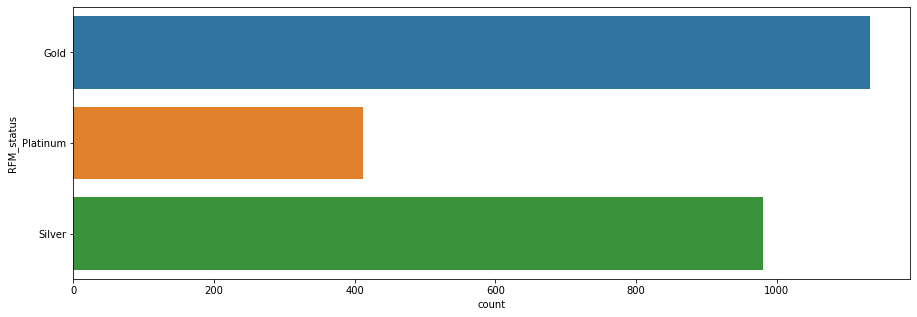

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(y="RFM_status",data=RFM)
plt.show()

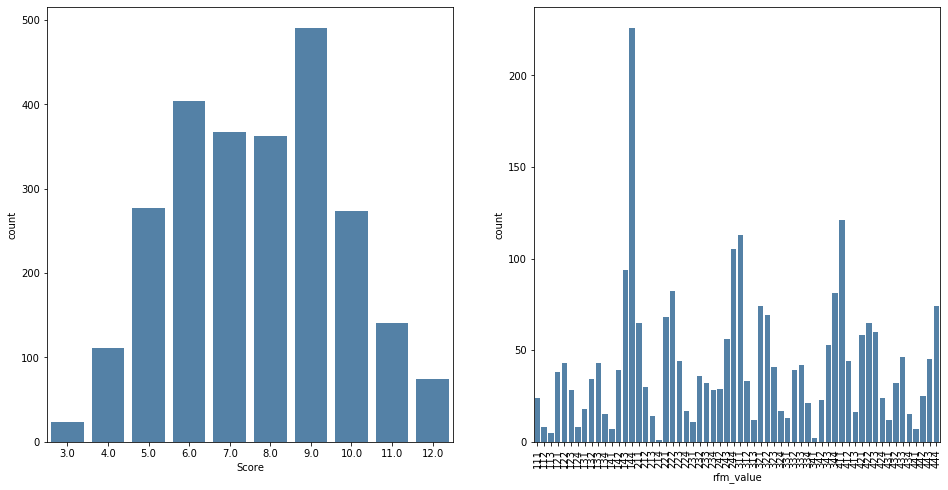

In [19]:


fig, ax = plt.subplots(1, 2, figsize=(16, 8))
plt.xticks(rotation=90)
sns.countplot(x="Score", data=RFM, color='steelblue', ax=ax[0],label=True)
sns.countplot(x="rfm_value", data=RFM, color='steelblue', ax=ax[1])

RECENCY vs MONETARY : <seaborn.axisgrid.FacetGrid object at 0x0000011BADE53788>
FREQUENCY vs RECENCY: <seaborn.axisgrid.FacetGrid object at 0x0000011BA9449388>
FREQUENCY vs MONETARY: <seaborn.axisgrid.FacetGrid object at 0x0000011BAA0D78C8>


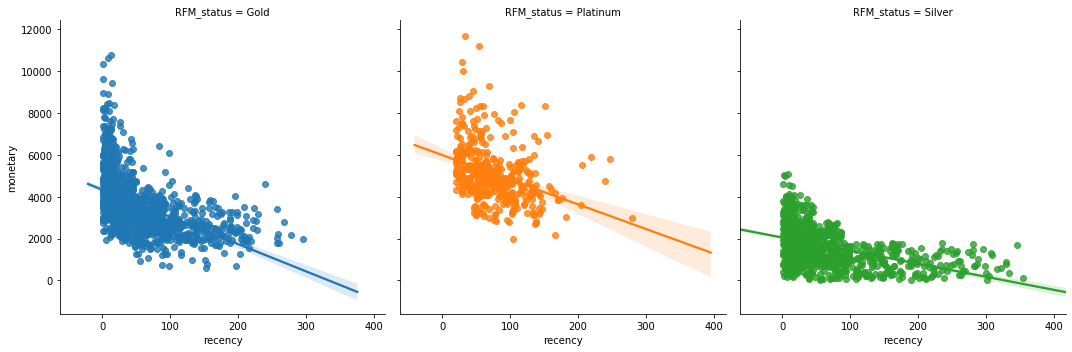

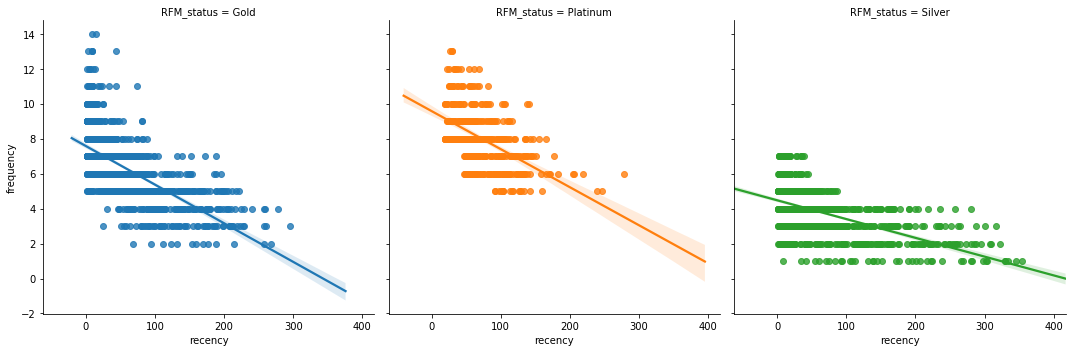

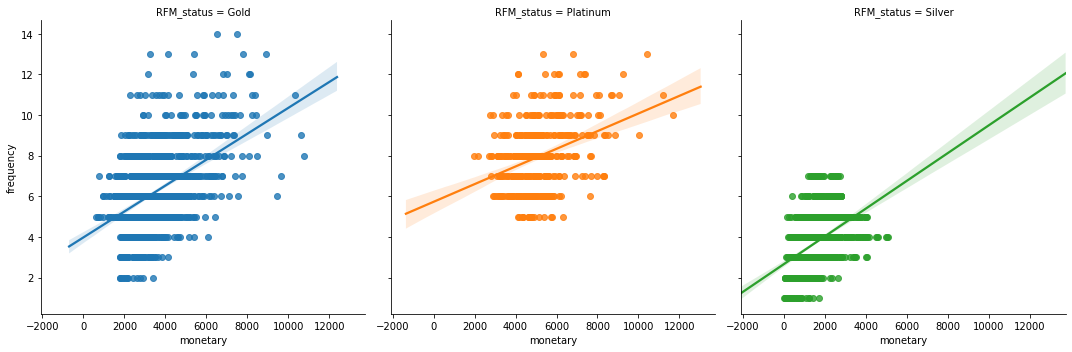

In [20]:
monetary_vs_recency=sns.lmplot(x='recency', y='monetary', data=RFM, col='RFM_status', hue='RFM_status', fit_reg=True)
print("RECENCY vs MONETARY :",monetary_vs_recency)

Frequency_vs_Recency=sns.lmplot(x='recency', y='frequency', data=RFM, col='RFM_status', hue='RFM_status', fit_reg=True)
print("FREQUENCY vs RECENCY:",Frequency_vs_Recency)

Monetary_vs_Frequency=sns.lmplot(x='monetary', y='frequency', data=RFM, col='RFM_status', hue='RFM_status', fit_reg=True)
print("FREQUENCY vs MONETARY:",Monetary_vs_Frequency)
 

In [21]:
RFM["RFM_status"].value_counts()

Gold        1133
Silver       980
Platinum     412
Name: RFM_status, dtype: int64

In [22]:
topvalue=RFM.groupby("customer_id").agg({"Score":"sum"}).nsmallest(1000,"Score")

print(topvalue.head(10))

             Score
customer_id       
97             3.0
343            3.0
469            3.0
473            3.0
565            3.0
1043           3.0
1307           3.0
1887           3.0
1932           3.0
1951           3.0


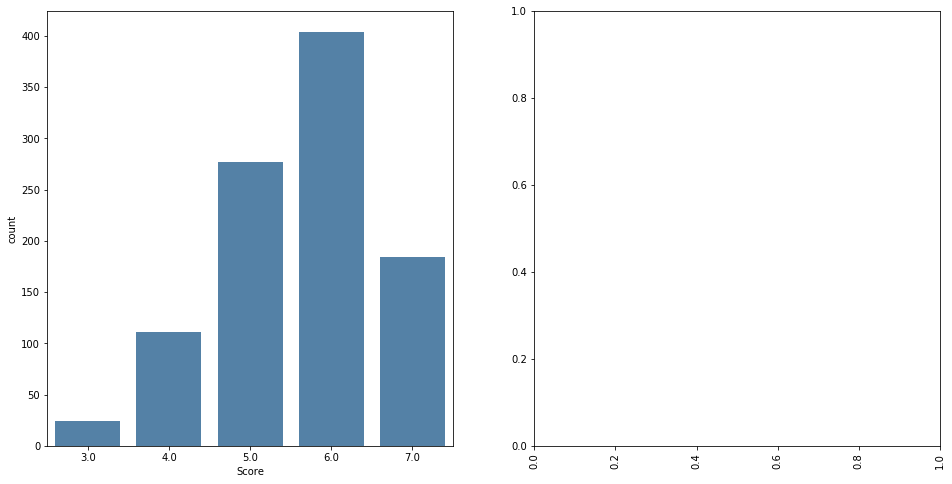

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
plt.xticks(rotation=90)
sns.countplot(x="Score", data=topvalue,color='steelblue',ax=ax[0],label=True)